In [1]:
import pandas as pd, numpy as np

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/rhishikeshpadole/Nobbas-Technologies/master/CSV%201.csv')

In [7]:
pd.set_option('display.max_columns', 500)

## here, We are going to impute the columns which has some relevance and can be imputed decently.
- stateOrProvince
- livingArea
- lotSize

In [9]:
data.isnull().sum()

id                         0
city                       0
country                    0
fullStreetAddress          0
postalCode                 0
stateOrProvince            1
unitNumber               782
bathrooms                  0
bedrooms                   0
listingDescription        58
listingTitle               0
latitude                 111
longitude                111
listPrice                  0
livingArea               174
livingAreaUnit             0
yearBuilt                109
lotSize                  338
lotSizeUnit                0
propertySubType            0
listingCategory            0
numParkingSpaces         440
createdAt                  0
geocodioAccuracyScore    873
photoscount                0
grade                      0
dtype: int64

In [13]:
regression_dataset = csv1[['city', 'country', 'stateOrProvince', 'bathrooms', 'bedrooms', 'listPrice', 'livingArea', 'propertySubType', 'listingCategory', 'photoscount', 'grade', 'lotSize']]
#topic_modelling_dataset = csv1[['listingDescription']]
#clustering_dataset = csv1[['latitude', 'longitude']]

In [14]:
regression_dataset.isnull().sum()

city                 0
country              0
stateOrProvince      1
bathrooms            0
bedrooms             0
listPrice            0
livingArea         174
propertySubType      0
listingCategory      0
photoscount          0
grade                0
lotSize            338
dtype: int64

## 1] Imputing stateOrProvince

In [16]:
# Here, we could be impute 'stateOrProvince' by binomial-Naive-Bayes classifier by taking city as input
# But after chaecking, it came to know that missing value is out of America, So labelling just by 'Others'
regression_dataset['stateOrProvince'] = regression_dataset['stateOrProvince'].fillna('Other')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Imputing livingArea

## We are going to predict livingArea by using listPrice as input variable

In [16]:
corr1 = regression_dataset[['listPrice', 'livingArea']]

In [17]:
train = corr1[corr1['livingArea'].isnull() == False]
test = corr1[corr1['livingArea'].isnull() == True]

In [18]:
train.isnull().sum()

listPrice     0
livingArea    0
dtype: int64

In [19]:
train_x = train.drop('livingArea', axis = 1)
train_y = train['livingArea']
test_x = test.drop('livingArea', axis = 1)
test_y = test['livingArea']

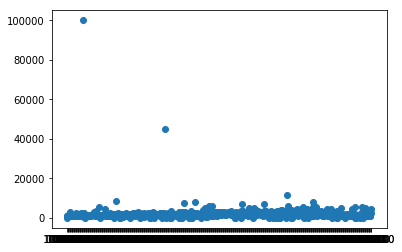

In [20]:
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y)

# we can see outliers are suppressing the scatter plot; So, we have to cap outliers by fencing 

In [22]:
lower_fence_y = train_y.quantile(0.25) - (1.15 * (train_y.quantile(0.75) - train_y.quantile(0.25)))
upper_fence_y = train_y.quantile(0.75) + (1.15 * (train_y.quantile(0.75) - train_y.quantile(0.25)))

In [23]:
outlier_train_y = []
for y in train_y:
    if (y > upper_fence_y):
        y = upper_fence_y
    elif (y < lower_fence_y):
        y = lower_fence_y
    outlier_train_y.append(y)    

In [24]:
lower_fence_x = train_x.quantile(0.25)[0] - (1 * (train_x.quantile(0.75)[0] - train_x.quantile(0.25)[0]))
upper_fence_x = train_x.quantile(0.75)[0] + (1 * (train_x.quantile(0.75)[0] - train_x.quantile(0.25)[0]))

In [25]:
outlier_train_x = []
for x in train_x['listPrice']:
    if (x > upper_fence_x):
        x = upper_fence_x
    elif (x < lower_fence_x):
        x = lower_fence_x
    outlier_train_x.append(x)    

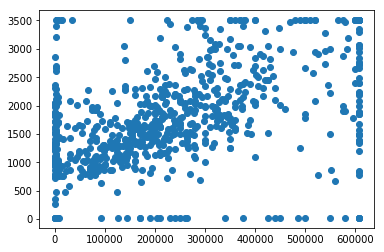

In [26]:
import matplotlib.pyplot as plt
plt.scatter(outlier_train_x, outlier_train_y)

# We can see there is strong correlation between livingArea and listPrice

In [27]:
# To manipulate the data, dataframe will be easy to handle
outlier_train_x_df = pd.DataFrame(outlier_train_x)
outlier_train_y_df = pd.DataFrame(outlier_train_y)

In [28]:
# Predicting livingArea in accordance of listPrice (simple linear regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(outlier_train_x_df, outlier_train_y_df)
predicted_living_Area = model.predict(test_x)

In [29]:
predicted_living_Area = pd.DataFrame(predicted_living_Area)

In [30]:
predicted_living_Area = predicted_living_Area.rename(columns = {0 : 'living_Area'})

In [31]:
#Appending predicted null values in new list of non-null values

outlier_train_y_list = outlier_train_y
for i in predicted_living_Area['living_Area']:
    #print(i)
    outlier_train_y_list.append(i)

1312.8586134364762
1310.3321934242115
1309.5237390202867
1312.2522726335328
1317.9114534610057
1311.9996306323062
1309.927966222249
1311.0395910276457
1311.949102232061
1498.8031263391622
1313.2628406384385
3802.8981775246193
1316.8928009120607
1620.0712869278705
1313.4649542394197
1331.0488375247826
1308.8163414168525
3631.1016166906156
1313.667067840401
1962.6538405909714
1311.8480454315704
1311.4215857335
1309.1195118183243
1985.8766933437091
1311.2417046286268
3257.191454875432
1314.879749446288
1742.0145069438558
1311.0395910276457
1436.1479100349964
1311.8480454315704
1309.3216254193055
1588.7436787757874
2205.9743625401948
2859.0276609425064
1308.715284616362
2418.217897202552
3022.739677737263
1518.8123728362991
2345.659114450308
1749.423991555826
1747.200741945033
1640.2826470259886
1564.490046658046
1690.6089336703026
1313.667067840401
1680.7053672222246
1311.2417046286268
1619.8691733268893
1309.9784946224945
1310.3321934242115
1731.2337674675198
5349.06520389464
3271.339406

In [33]:
# replacing old 'livingArea' by new predicted 'livingArea'

regression_dataset = regression_dataset.drop('livingArea', axis=1)
regression_dataset['livingArea'] = outlier_train_y_list

# We have imputed livingArea column by predicting it.

In [34]:
regression_dataset = regression_dataset[['city', 'country', 'stateOrProvince', 'bathrooms', 'bedrooms','listPrice', 'propertySubType', 'listingCategory', 'photoscount', 'livingArea','grade']]

In [47]:
regression_dataset_dummies = pd.get_dummies(regression_dataset.drop('grade', axis=1))
regression_dataset_dummies['grade'] = regression_dataset['grade']

In [49]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(regression_dataset_dummies, test_size=0.25)
train_y_data = train_data['grade']
train_x_data = train_data.drop('grade', axis=1)
test_y_data = test_data['grade']
test_x_data = test_data.drop('grade', axis=1)

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
model.fit(train_x_data, train_y_data)
prediction = model.predict(test_x_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [78]:
df = pd.DataFrame({'actual' : test_y_data, 'pred' : prediction})

In [79]:
df['stat'] = df['actual'] == df['pred']

In [86]:
print('Accuracy : ',round(((df['stat'].value_counts()/df.shape[0])*100)[1], 2),'%')

Accuracy :  93.33 %


In [ ]:
# It is not effective with Multinomial-Naive-Bayes and tree classifers

# Reference : 
- https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

# Report : 

### We need region column (A region means collection of states i.e. Region is between States and Countries). By this we can give smoothing for a classifier. Because, too much categories and very less categories creates problems.

### We can remove livingArea column because, (1) it has 37 % missing values, (2) there is a strong correlation between livingArea and listPrice. This may cause data redundancy, which also can give an overfitted model.

# I am comfortable with classifying CSV1 dataset as achievable

# ===============================================================

# 1] 'FavouritesCount' column :

### As we have seen by sentiment analysis, maximum peoples do not complain openly, but they give a netral(or sometimes exaggerated by positive response), and sometimmes customers who are willing to buy but can not afford it now, they will add the properties in their favourite list just to see. So, 'FavouriteCounts' column may not make any sense for us.
### But, this also replicates that the property is likable by customers
### So, what we can do if FavouriteCount is made available:
- Merging with CSV1 
- we can convert this column into n categories according to distribution of data

# I am still confused with favouritesCount column, because I am lacking in Property Business Domain.
# But to classify, I bin it into 'Achievable'

# =================================================================

# 2] 'ColabProjects' column : 

### What we can do with 'ColabProjects'
- We can merge it with CSV1
- We surely have to classify it into categories, because, it may not matter that how many partners involved in this property, but it may matter that, whether there it is a colabProject or not. So, rather count, categories may make sense.

# I can bin it into 'Achievable'

# I think all the datasets are important for our classification problems.

In [25]:
data.columns

Index(['id', 'city', 'country', 'fullStreetAddress', 'postalCode',
       'stateOrProvince', 'unitNumber', 'bathrooms', 'bedrooms',
       'listingDescription', 'listingTitle', 'latitude', 'longitude',
       'listPrice', 'livingArea', 'livingAreaUnit', 'yearBuilt', 'lotSize',
       'lotSizeUnit', 'propertySubType', 'listingCategory', 'numParkingSpaces',
       'createdAt', 'geocodioAccuracyScore', 'photoscount', 'grade'],
      dtype='object')

In [57]:
from sklearn.preprocessing import normalize
lot_data = data[data['bathrooms'].isnull() == False][data['bedrooms'].isnull() == False][['livingArea', 'lotSize']]
#normalised_data = normalize(lot_data)

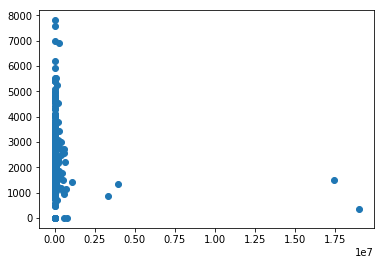

In [58]:
plt.scatter(lot_data['lotSize'], lot_data['livingArea'])

In [64]:
lower_fence_y = lot_data['livingArea'].quantile(0.25) - (2.15 * (lot_data['livingArea'].quantile(0.75) - lot_data['livingArea'].quantile(0.25)))
upper_fence_y = lot_data['livingArea'].quantile(0.75) + (2.15 * (lot_data['livingArea'].quantile(0.75) - lot_data['livingArea'].quantile(0.25)))

In [65]:
outlier_lot_train_y = []
for y in lot_data['livingArea']:
    if (y > upper_fence_y):
        y = upper_fence_y
    elif (y < lower_fence_y):
        y = lower_fence_y
    outlier_lot_train_y.append(y)    

In [66]:
lower_fence_x = lot_data['lotSize'].quantile(0.25) - (2.15 * (lot_data['lotSize'].quantile(0.75) - lot_data['lotSize'].quantile(0.25)))
upper_fence_x = lot_data['lotSize'].quantile(0.75) + (2.15 * (lot_data['lotSize'].quantile(0.75) - lot_data['lotSize'].quantile(0.25)))

In [67]:
outlier_lot_train_x = []
for x in lot_data['lotSize']:
    if (x > upper_fence_x):
        x = upper_fence_x
    elif (x < lower_fence_x):
        x = lower_fence_x
    outlier_lot_train_x.append(x)    

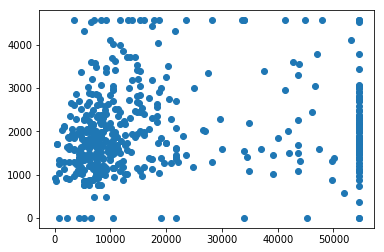

In [68]:
plt.scatter(outlier_lot_train_x, outlier_lot_train_y)

## The above scatter plot showing heteroscedasticity property.
## Linear model may not give efficient output to us.

## I am still finding a way to impute lotSize.
## It may not be possible to impute lotSize with given data.